<a href="https://colab.research.google.com/github/dlab-berkeley/DSSJ-2025/blob/main/COMPAS_Recidivism_Racial_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This line of code connects your google drive to the notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## DESCRIPTION:

The **COMPAS** (*Correctional Offender Management Profiling for Alternative Sanctions*) algorithm is a widely used commercial tool that assists judges and parole officers in assessing a criminal defendant’s likelihood of reoffending. However, [academic studies](https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm) have revealed that COMPAS exhibits a racial bias favoring white defendants over Black defendants.

A two-year follow-up study, which tracked individuals to see who actually committed crimes or violent crimes post-assessment, demonstrated a troubling pattern of misclassification errors as measured by precision and sensitivity.

### SOCIAL JUSTICE IMPLICATION:
 > What we are going to do in this notebook:

  - Explore which features are most influential in predicting the COMPAS risk score or recidivism risk. This analysis can reveal if features like race, gender, or socioeconomic status disproportionately impact the risk assessment, potentially leading to biased outcomes

  - Calculate false positives and false negatives for Black and white defendants separately, and assess the disparities in predictive accuracy. This can help you understand the extent of racial bias in the COMPAS algorithm’s predictions.

  - Use this dataset to raise awareness about algorithmic bias and its social implications. Developing case studies or presentations on how biases manifest in predictive tools can help inform policy-makers, researchers, and the public about the importance of fairness in criminal justice technology


### Data Science Methods:
> The purpose of this notebook is to construct different machine learning models to identify and analyze racial bias within the COMPAS dataset. We will use several modeling techniques to predict recidivism and examine whether bias is present in the model's predictions. We will also explore parameter tuning to improve model accuracy and fairness.

 - Data Cleaning and Preparation
 - Define Features and Target Variable
 - Split the Data into Training and Testing Sets
 - Applying Models for Logistic Regression and CART

---

# COMPAS Recidivism Analysis

## Step 1: Loading the Dataset


Note: The original dataset has been preprocessed and filtered to focus on the specific characteristics relevant to the analysis in this notebook. This dataset is a refined version of the original raw data, titled *compas-scores-two-years.csv*.

 To begin, let's load the COMPAS recidivism dataset into our environment. This dataset will allow us to examine the factors that contribute to COMPAS risk scores and investigate potential biases.

1. **Importing Necessary Libraries:**
  To start, we need to import the essential libraries required for data analysis. These libraries provide the tools necessary for loading, manipulating, and analyzing the dataset.

2. **Loading the Dataset:**
  Using the pandas library, we can employ the read_csv function to load our dataset into a Pandas DataFrame. This DataFrame will allow us to manipulate and analyze the data efficiently within our notebook environment.

3. **Inspecting the Dataset:**
  After loading the dataset, it’s crucial to familiarize ourselves with its structure. Understanding the organization and composition of the data will guide our analysis. By using the .info() method, we obtain an overview of the dataset, including column names, data types, and counts of non-null values. This initial exploration helps us identify potential data cleaning needs and provides insights into how we might approach further analysis.

  ### Brief description of each column in the dataset:
  
    - **id**: Unique identifier for each record in the dataset.
    - **name**: Full name of the individual being assessed.
    - **first**: First name of the individual.
    - **last**: Last name of the individual.
    - **compas_screening_date**: The date when the individual was screened using the COMPAS tool.
    - **age**: Age of the individual at the time of screening.
    - **c_charge_degree**: Degree of the charge faced by the individual (e.g., misdemeanor, felony).
    - **race**: Race of the individual.
    - **age_cat**: Age category of the individual, likely grouped (e.g., juvenile, adult).
    - **score_text**: The risk category assigned to the individual (e.g., low, medium, high risk).
    - **sex**: Gender of the individual (male or female).
    - **priors_count**: Number of prior offenses committed by the individual.
    - **days_b_screening_arrest**: Number of days between screening and arrest.
    - **decile_score**: COMPAS risk score on a scale (typically 1-10), predicting the likelihood of reoffending.
    - **is_recid**: Indicates whether the individual recidivated (committed another offense) after screening.
    - **two_year_recid**: Indicates if the individual recidivated within two years of the screening.
    - **c_jail_in**: Date when the individual was admitted to jail.
    - **c_jail_out**: Date when the individual was released from jail.
    - **length_of_stay**: Length of time (in days) the individual spent in jail for the particular charge.

In [ ]:
# Import necessary library
import pandas as pd # pandas is a powerful library for data manipulation and analysis
import numpy as np # numpy is a fundamental package for numerical computing in Python

In [ ]:
# Load the dataset (update the file path as needed)
recidivism_data = pd.read_csv('/content/drive/MyDrive/Diego Sotomayor/compas_data.csv')

In [ ]:
# Display dataset information to understand its structure
recidivism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6172 non-null   int64  
 1   name                     6172 non-null   object 
 2   first                    6172 non-null   object 
 3   last                     6172 non-null   object 
 4   compas_screening_date    6172 non-null   object 
 5   age                      6172 non-null   int64  
 6   c_charge_degree          6172 non-null   object 
 7   race                     6172 non-null   object 
 8   age_cat                  6172 non-null   object 
 9   score_text               6172 non-null   object 
 10  sex                      6172 non-null   object 
 11  priors_count             6172 non-null   int64  
 12  days_b_screening_arrest  6172 non-null   float64
 13  decile_score             6172 non-null   int64  
 14  is_recid                

## Challenge: Investigating Columns

- Take a few moments to examine the column names and infer what kind of data might be stored in each. Which columns seem immediately relevant to the analysis of recidivism?

- Which columns might be critical for assessing the risk of recidivism and why?
Consider which variables might impact or correlate with a person’s likelihood of reoffending. For example, do you think demographic information (such as age or ethnicity) or previous criminal history might be important?

- Are there any columns that seem redundant or irrelevant to our goal of analyzing recidivism risk?

- Based on column names, do you see any that could help us investigate bias, especially related to demographic information like race or gender?

---

## Step 2: Data Cleaning and EDA

Data cleaning and preparation are critical steps in any data science project. Before we can analyze the COMPAS dataset to identify potential bias, we need to ensure the data is clean, consistent, and ready for analysis. In this section, we’ll walk through each cleaning step, explaining what we’re doing and why it’s important.



1. Dropping Irrelevant Columns
  - **Explanation:**
  Datasets often include columns that are irrelevant to the specific analysis or model we’re building. Irrelevant columns are those that don’t contribute to our analysis goals or contain sensitive information that could lead to privacy issues. In the COMPAS dataset, columns like Person_ID, LastName, FirstName, and MiddleName don’t offer any value for predicting recidivism risk or analyzing bias. These are identifiers that help distinguish records but don’t add any useful information about the person’s likelihood of reoffending.

In [ ]:
# Dropping columns that are not needed for our analysis
# Simplifies the Data
# Focuses on Relevant Information:
columns_to_drop = ['id', 'name', 'first', 'last', 'compas_screening_date', 'c_jail_in', 'c_jail_out']
recidivism_data = recidivism_data.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
recidivism_data.head(10)

,age,c_charge_degree,race,age_cat,score_text,sex,priors_count,days_b_screening_arrest,decile_score,is_recid,two_year_recid,length_of_stay
0,69,F,Other,Greater than 45,Low,Male,0,-1.0,1,0,0,0
1,34,F,African-American,25 - 45,Low,Male,0,-1.0,3,1,1,10
2,24,F,African-American,Less than 25,Low,Male,4,-1.0,4,1,1,1
3,44,M,Other,25 - 45,Low,Male,0,0.0,1,0,0,1
4,41,F,Caucasian,25 - 45,Medium,Male,14,-1.0,6,1,1,6
5,43,F,Other,25 - 45,Low,Male,3,-1.0,4,0,0,0
6,39,M,Caucasian,25 - 45,Low,Female,0,-1.0,1,0,0,2
7,27,F,Caucasian,25 - 45,Low,Male,0,-1.0,4,0,0,1
8,23,M,African-American,Less than 25,Medium,Male,3,0.0,6,1,1,4
9,37,M,Caucasian,25 - 45,Low,Female,0,0.0,1,0,0,0


> Before applying any model to our data.we should aim to understand the demographic distribution of defendants by race in the COMPAS dataset. By calculating the percentage representation of each racial group, we can observe potential disparities that might influence the overall risk assessment outcomes. This breakdown serves as a preliminary step in identifying possible biases within the dataset that could affect certain demographic groups.

In [ ]:
# Run this code

# Total number of rows
total_rows = len(recidivism_data)

# Calculating the percentage of each race category
print("Black defendants: {:.2f}%".format((3175 / total_rows) * 100))
print("White defendants: {:.2f}%".format((2103 / total_rows) * 100))
print("Hispanic defendants: {:.2f}%".format((509 / total_rows) * 100))
print("Asian defendants: {:.2f}%".format((31 / total_rows) * 100))
print("Native American defendants: {:.2f}%".format((11 / total_rows) * 100))

Black defendants: 51.44%
White defendants: 34.07%
Hispanic defendants: 8.25%
Asian defendants: 0.50%
Native American defendants: 0.18%


In [ ]:
# Summary of 'sex' column
sex_summary = recidivism_data['sex'].value_counts().sort_index()
print("\nSex Breakdown:")
print(sex_summary)

# Calculating the percentage of each sex category
print("Men: {:.2f}%".format((4997 / total_rows) * 100))
print("Women: {:.2f}%".format((1175 / total_rows) * 100))


Sex Breakdown:
sex
Female    1175
Male      4997
Name: count, dtype: int64
Men: 80.96%
Women: 19.04%


>Let's analyze the relationship between these two categorical variables. In this case we can use a function from the panda library **pd.crosstab()**. This function shows the count of each unique combination of the two variables (sex and race), allowing you to observe how many individuals belong to each group.

In [ ]:
# Cross-tabulation of 'sex' and 'race'
sex_race_ct = pd.crosstab(recidivism_data['sex'], recidivism_data['race'])
print("\nSex by Race Breakdown:")
print(sex_race_ct)


Sex by Race Breakdown:
race    African-American  Asian  Caucasian  Hispanic  Native American  Other
sex                                                                         
Female               549      2        482        82                2     58
Male                2626     29       1621       427                9    285


Based on this small analyis on just two column of our dataset. Here are some questions for you to start thinking aboout:

1. Based on the racial distribution, which racial group has the highest representation among defendants, and what might this overrepresentation suggest in terms of systemic issues?

2. Given the disproportionate racial distribution, how might the biases in this data affect the accuracy and fairness of predictive models like COMPAS?

3. What strategies could be implemented to reduce potential biases in datasets like this one, particularly for use in predictive algorithms?

----

###Visualizing key variables can often provide deeper insights into our data, allowing us to better understand patterns and relationships within the dataset! Let's try it!

###STEP 1:
>Import Necessary Libraries:
 - Matplotlib (plt): A plotting library in Python that provides control over plotting, useful for setting figure layouts.
 - Seaborn (sns): A library built on top of Matplotlib, making it easier to create informative statistical graphics. Here, it simplifies creating bar plots with count data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

###STEP 2:
>Filter the Data for Specific Groups:
 - Data Filtering: We’re creating two new DataFrames, df_black and df_white, to separately analyze African-American and Caucasian defendants.
 - Reason for Filtering: By analyzing these groups separately, we can compare their distributions and detect potential differences or biases in decile scores assigned to different racial groups.

In [ ]:
# Filter data for African-American and Caucasian defendants
df_black = recidivism_data[recidivism_data['race'] == 'African-American']
df_white = recidivism_data[recidivism_data['race'] == 'Caucasian']

###STEP 3:
>Set Up the Plotting Figure for Side-by-Side Plots:
 - plt.subplots(1, 2, ...): Creates a figure with 1 row and 2 columns of subplots, allowing us to place two plots side by side.
 - figsize=(14, 6): Sets the size of the figure. Adjusting the figure size can make plots easier to read and compare.
 - sharey=True: Ensures that both plots share the same y-axis, making it easy to compare counts between the two groups.

>Create a Bar Plot:

 - sns.countplot(): Creates a bar plot showing the count of each unique value in decile_score for African-American defendants. This is a quick way to visualize the distribution of a categorical variable.
 - order=sorted(df['decile_score'].unique()): Ensures the x-axis (decile score) is ordered correctly from 1 to 10, improving readability.
 - ax=axes[0]: Directs the plot to the first subplot (left side).
 - Additional Plot Formatting:
    - set_title: Adds a title to the subplot.
    - set_xlabel and set_ylabel: Label the x and y axes, respectively, for context.
    - set_ylim(0, 650): Sets the y-axis limit to make both plots directly comparable.

Text(0, 0.5, 'Count')

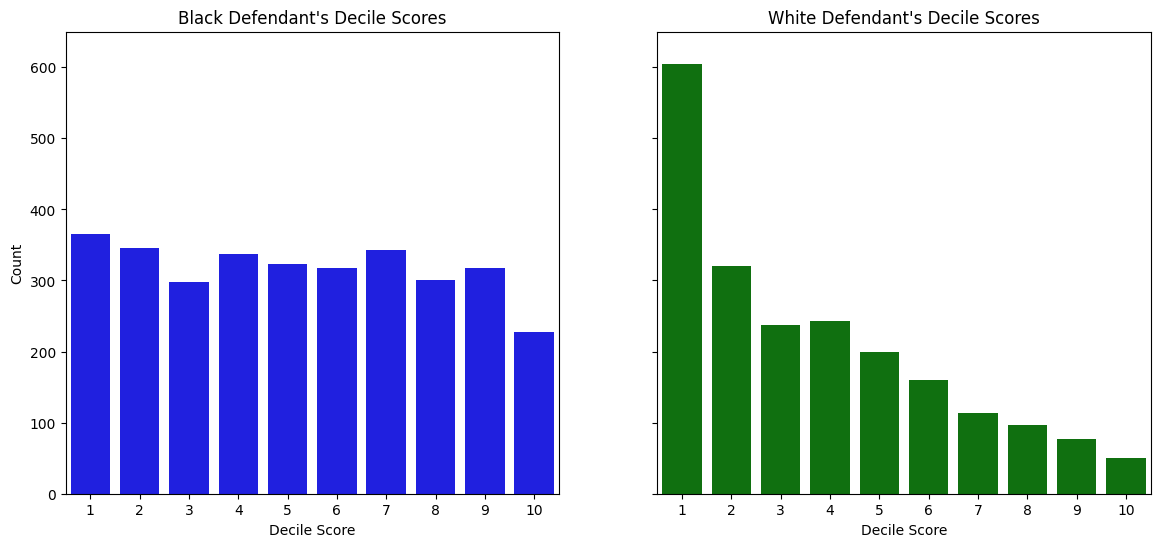

In [ ]:
# Set up the figure for side-by-side bar plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for African-American defendants
sns.countplot(data=df_black, x='decile_score', order=sorted(recidivism_data['decile_score'].unique()), ax=axes[0], color="blue")
axes[0].set_title("Black Defendant's Decile Scores")
axes[0].set_xlabel("Decile Score")
axes[0].set_ylim(0, 650)
axes[0].set_ylabel("Count")


# Plot for Caucasian defendants
sns.countplot(data=df_white, x='decile_score', order=sorted(recidivism_data['decile_score'].unique()), ax=axes[1], color="green")
axes[1].set_title("White Defendant's Decile Scores")
axes[1].set_xlabel("Decile Score")
axes[1].set_ylim(0, 650)
axes[1].set_ylabel("Count")

In [ ]:
# Generate a cross-tabulation of decile scores by race to analyze the distribution of scores within each racial group
# This table provides insight into the frequency of each decile score across different races, helping to identify potential patterns or disparities.
decile_race_ct = pd.crosstab(recidivism_data['decile_score'], recidivism_data['race'])
print("\nDecile Score by Race Cross-tabulation:")
print(decile_race_ct)


Decile Score by Race Cross-tabulation:
race          African-American  Asian  Caucasian  Hispanic  Native American  \
decile_score                                                                  
1                          365     15        605       159                0   
2                          346      4        321        89                2   
3                          298      5        238        73                1   
4                          337      0        243        47                0   
5                          323      1        200        39                0   
6                          318      2        160        27                2   
7                          343      1        113        28                2   
8                          301      2         96        14                0   
9                          317      0         77        17                2   
10                         227      1         50        16                2   

race       

**Note**: The COMPAS system assigns defendants two types of scores: a categorical risk score (High, Medium, Low) and a corresponding decile score ranging from 1 to 10, with higher deciles indicating a higher predicted risk of reoffending. These scores play a crucial role in influencing judicial decisions by providing a quantitative assessment of a defendant's risk level.


## > What observations and inferences can be drawn from the plots?

  > The decile score distribution reveals significant racial disparities that could impact the fairness of judicial outcomes. The higher frequency of low-risk classifications for White defendants, contrasted with the more even distribution for Black defendants, suggests potential bias in the risk assessment process. This insight underscores the importance of critically evaluating and potentially reforming predictive tools like COMPAS to promote equity within the criminal justice system.

- Questions to Consider:

 - Why is there such a clear downward trend in decile scores for White defendants, and what factors might contribute to this?
 - How does the even distribution of decile scores for Black defendants reflect broader issues within the dataset or algorithm?

---

## After thoroughly analyzing the dataset and identifying the relevant variables of interest, I believe it is time to proceed with applying models to the data!

In a task as sensitive as predicting recidivism, it’s essential to select a model that balances accuracy with interpretability. Logistic regression’s simplicity and transparency make it a strong choice for this purpose. Similarly, CART offers a compelling alternative, especially for capturing non-linear relationships within the data. We will apply both methods to evaluate their effectiveness in prediction and assess how well each allows us to detect potential biases in the data. Ultimately, our goal is to determine which model provides the best balance of accuracy, fairness, and interpretability.

# LOGISTIC REGRESION

## Why Use Logistic Regression for Predicting Recidivism?
Predicting recidivism—whether someone is likely to re-offend—can be framed as a binary classification problem, where the two possible outcomes are "recidivist" (1) or "non-recidivist" (0)



Steps:

1. Baseline Evaluation
2. Data Preparation
3. Logistic Regression Models
4. Model Evaluation

In [ ]:
# Importing Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import statsmodels.api as sm

---

In [ ]:
# Step 1: Encoding Categorical Variables
recidivism_data['gender_factor'] = recidivism_data['sex'].apply(lambda x: 1 if x == 'Female' else 0)
recidivism_data['age_factor'] = recidivism_data['age_cat'].apply(lambda x: 1 if x == 'Greater than 45' else (2 if x == 'Less than 25' else 0))
race_map = {'Caucasian': 0,
            'African-American': 1,
            'Asian': 2,
            'Hispanic': 3,
            'Native American': 4,
            'Other': 5}

recidivism_data['race_factor'] = recidivism_data['race'].map(race_map)
recidivism_data['score_factor'] = recidivism_data['score_text'].apply(lambda x: 1 if x == 'High' else 0)
recidivism_data['crime_factor'] = recidivism_data['c_charge_degree'].apply(lambda x: 1 if x == 'M' else 0)

In [ ]:
# Step 2: Define Independent and Dependent Variables
X = recidivism_data[['gender_factor', 'age_factor', 'race_factor', 'priors_count', 'crime_factor', 'two_year_recid']]
y = recidivism_data['score_factor']

In [ ]:
# Add a constant for the intercept
X = sm.add_constant(X)

In [ ]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [ ]:
# Step 4: Logistic Regression Model
logit_model = sm.Logit(y_train, X_train)  # Initialize the model
log_reg = logit_model.fit()  # Fit the model

Optimization terminated successfully.
         Current function value: 0.389664
         Iterations 7


In [ ]:
# The summary includes coefficients, standard errors, z-values, p-values, and confidence intervals
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           score_factor   No. Observations:                 4320
Model:                          Logit   Df Residuals:                     4313
Method:                           MLE   Df Model:                            6
Date:                Tue, 12 Nov 2024   Pseudo R-squ.:                  0.1797
Time:                        13:03:17   Log-Likelihood:                -1683.3
converged:                       True   LL-Null:                       -2052.1
Covariance Type:            nonrobust   LLR p-value:                4.846e-156
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.8265      0.113    -24.962      0.000      -3.048      -2.605
gender_factor     -0.0521      0.122     -0.427      0.670      -0.291       0.187
age_factor         0.4092      0.054

In [ ]:
# Step 5: Model Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class

In [ ]:
# Step 6: Model Evaluation
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1461   35]
 [ 286   70]]


In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8267


**Question:** Does high accuracy guarantee that our model is fair or unbiased? Why or why not?

## Confusion Matrix and Accuracy

- Confusion Matrix: Shows the model's performance in terms of True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN). Here, accuracy is 82.67%, which indicates the proportion of correct predictions.

- Accuracy measures how often the model correctly classifies an instance. However, high accuracy does not imply fairness or lack of bias, especially in social justice contexts like predicting recidivism.

**Question:** What role do social and ethical considerations play when interpreting the results of a predictive model, especially in sensitive areas like criminal justice?

**Question:** How should we incorporate these considerations when making decisions based on the model’s predictions?

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90      1496
           1       0.67      0.20      0.30       356

    accuracy                           0.83      1852
   macro avg       0.75      0.59      0.60      1852
weighted avg       0.80      0.83      0.79      1852



## Classification Report

- The Classification Report includes metrics like precision, recall, and F1-score for each class. In this case, the model has lower recall (sensitivity) for the positive class (predicted recidivism), which might indicate bias if it fails to correctly identify individuals who are at high risk of recidivism, affecting interventions and outcomes.

- Precision and Recall are especially important for social justice applications since they show the model’s effectiveness at predicting recidivism without falsely labeling individuals, which could lead to unequal treatment or profiling.

**Question:** How might this affect individuals from different demographic groups, and what changes could we consider to ensure a fairer model?

In [ ]:
# Step 7: Feature Importance for Bias Detection
# Checking model coefficients for demographic influences
feature_names = X.columns
coefficients = log_reg.coef_[0]
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

const: -0.0044
gender_factor: -0.0503
age_factor: 0.4083
race_factor: -0.0717
priors_count: 0.1573
crime_factor: -0.4428
two_year_recid: 1.0422


## Feature importance for Bias Detection

  - The coefficients from logistic regression provide insight into feature importance and potential biases. For instance:

    - A positive coefficient (e.g., age_factor: 0.4083) indicates that an increase in this variable increases the likelihood of predicting recidivism.

    - The gender_factor and race_factor coefficients indicate how these demographic variables influence predictions. A significant, positive coefficient for certain racial or gender groups might suggest bias, meaning the model is more likely to predict recidivism for individuals from these groups.

  - Social justice analysis involves examining whether variables like race_factor or gender_factor unfairly influence the prediction, which could reflect systemic biases in the data or model.

In [ ]:
# Step 8: Adjusting Decision Threshold
# Set threshold to 0.4 instead of 0.5 and evaluate the change in performance
y_pred_adjusted = (y_prob > 0.4).astype(int)
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)

print("Adjusted Confusion Matrix:\n", conf_matrix_adjusted)
print(f"Adjusted Accuracy: {accuracy_adjusted:.4f}")

Adjusted Confusion Matrix:
 [[1425   71]
 [ 255  101]]
Adjusted Accuracy: 0.8240


## Adjusted Decision Threshold

- By adjusting the decision threshold from 0.5 to 0.4, the model can become more sensitive to predicting the positive class (recidivism), potentially increasing the True Positive Rate (sensitivity). This adjustment can be a strategy to ensure more individuals at high risk are correctly identified but may also lead to more false positives.

- Adjusted Confusion Matrix: After changing the threshold, the adjusted confusion matrix reflects the change in prediction distribution. While accuracy remains similar, other social justice metrics, such as False Positive Rate (FPR), need to be checked to ensure fairness.

In [ ]:
# Separate confusion matrix calculations by race group
for race, group_data in recidivism_data.groupby('race_factor'):
    y_test_race = y_test[group_data.index]
    y_pred_race = (y_prob[group_data.index] > 0.5).astype(int)

    conf_matrix_race = confusion_matrix(y_test_race, y_pred_race)
    print(f"Confusion Matrix for Race Group {race}:\n", conf_matrix_race)

    # Calculate false positive and false negative rates
    FP = conf_matrix_race[0, 1]
    FN = conf_matrix_race[1, 0]
    TN = conf_matrix_race[0, 0]
    TP = conf_matrix_race[1, 1]

    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)

    print(f"False Positive Rate for Race Group {race}: {FPR:.4f}")
    print(f"False Negative Rate for Race Group {race}: {FNR:.4f}")


In [ ]:
# Step 9: Calculating TPR, FPR, TNR, and FNR
# True Positive, False Positive, True Negative, False Negative
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]

# Metrics
TPR = TP / (TP + FN)  # Sensitivity or Recall
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FNR = FN / (FN + TP)  # False Negative Rate

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")

True Positive Rate (TPR): 0.1966
False Positive Rate (FPR): 0.0234
True Negative Rate (TNR): 0.9766
False Negative Rate (FNR): 0.8034


## TPR, FPR, TNR and FNR

- True Positive Rate (TPR): Measures the proportion of actual positives correctly identified. Here, TPR is low (0.1966), meaning the model struggles with sensitivity.

- False Positive Rate (FPR): Important for social justice, as a high FPR could mean individuals are incorrectly labeled as likely recidivists, possibly leading to unjust consequences.

- True Negative Rate (TNR) and False Negative Rate (FNR) further clarify the model’s effectiveness and potential biases. An FNR of 0.8034 suggests that the model frequently fails to identify actual recidivists, potentially a critical issue in preventing recidivism.

###Now let's get the Baseline Model
## Why?
The baseline model provides a minimum standard. If our logistic regression model doesn’t outperform this baseline, it suggests that the logistic regression model might not be valuable.
By comparing the logistic regression to the baseline model, we can determine if our model is genuinely effective or merely overfitting the data.


In [ ]:
from sklearn.dummy import DummyClassifier

baseline_model = DummyClassifier(strategy="most_frequent")

# Fit the model to the training data
baseline_model.fit(X_train, y_train)

# Predict on the test data
y_pred_baseline = baseline_model.predict(X_test)

In [ ]:
# Step 4: Evaluate the Baseline Model
# Confusion Matrix
conf_matrix_baseline = confusion_matrix(y_test, y_pred_baseline)
print("Baseline Confusion Matrix:\n", conf_matrix_baseline)

# Accuracy
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

# Classification Report
print("Baseline Classification Report:\n", classification_report(y_test, y_pred_baseline))

Baseline Confusion Matrix:
 [[1496    0]
 [ 356    0]]
Baseline Accuracy: 0.8078
Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1496
           1       0.00      0.00      0.00       356

    accuracy                           0.81      1852
   macro avg       0.40      0.50      0.45      1852
weighted avg       0.65      0.81      0.72      1852



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- Comparing this baseline with the logistic regression model is crucial. If the logistic regression model doesn’t significantly improve upon this baseline, it might suggest an inherent issue with the data or the modeling approach, especially in detecting and addressing biases in predicting recidivism.

**Question:** Given that the baseline model only predicts the majority class (non-recidivism), what does this tell us about the distribution of our data and potential biases?

---

# CART model

 Def:

CART, or Classification and Regression Trees, is a decision tree algorithm used for predictive modeling in machine learning. It’s popular because it is easy to interpret, visualize, and handle both classification (categorical outcomes) and regression (continuous outcomes) tasks.




Steps:

1. Data Preparation
2. CART implementation
3. Plotting the Decision Tree
4. Prouning Method

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# Step 1: Encoding Categorical Variables (Same as Logistic Regression)
# Encoding 'sex' as 'gender_factor' (1 if female, else 0)
recidivism_data['gender_factor'] = recidivism_data['sex'].apply(lambda x: 1 if x == 'Female' else 0)

# Encoding 'age_cat' as 'age_factor' (1 if age is "Greater than 45", 2 if "Less than 25", else 0)
recidivism_data['age_factor'] = recidivism_data['age_cat'].apply(lambda x: 1 if x == 'Greater than 45' else (2 if x == 'Less than 25' else 0))

# Mapping race categories to numerical values
race_map = {
    'Caucasian': 0,
    'African-American': 1,
    'Asian': 2,
    'Hispanic': 3,
    'Native American': 4,
    'Other': 5
}
recidivism_data['race_factor'] = recidivism_data['race'].map(race_map)

# Encoding 'score_text' as 'score_factor' (1 if 'High' else 0)
recidivism_data['score_factor'] = recidivism_data['score_text'].apply(lambda x: 1 if x == 'High' else 0)

# Encoding 'c_charge_degree' as 'crime_factor' (1 if 'M' else 0)
recidivism_data['crime_factor'] = recidivism_data['c_charge_degree'].apply(lambda x: 1 if x == 'M' else 0)

# Step 2: Define Independent and Dependent Variables
X = recidivism_data[['gender_factor', 'age_factor', 'race_factor', 'priors_count', 'crime_factor', 'two_year_recid']]
y = recidivism_data['score_factor']

In [ ]:
# Step 2
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Step 3.
# CART Model Implementation
# Setting up the Decision Tree Classifier
dtc = DecisionTreeClassifier(min_samples_leaf=5, ccp_alpha=0.005, class_weight='balanced', random_state=42)

# Train the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005, class_weight='balanced',
                       min_samples_leaf=5, random_state=42)

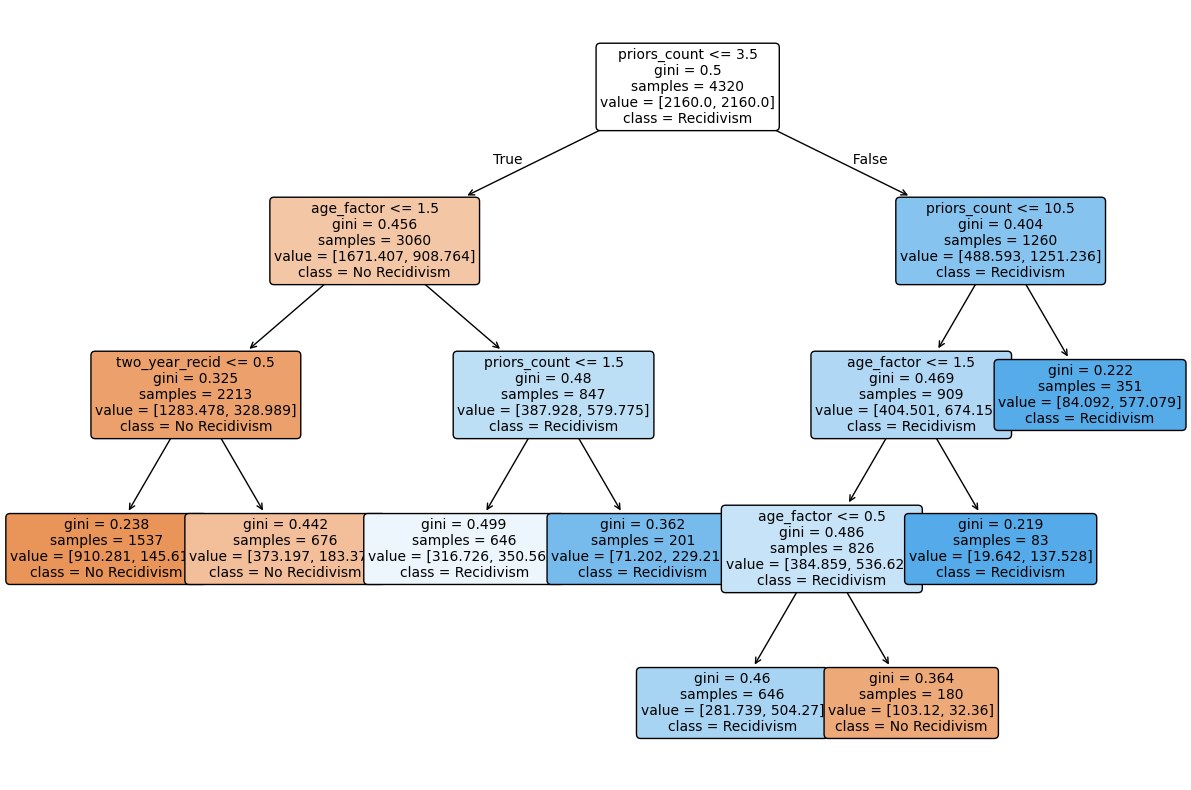

In [ ]:
# Step 4.
# Model Visualization

# Plotting the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dtc, feature_names=X_train.columns, class_names=['No Recidivism', 'Recidivism'], filled=True, rounded=True, fontsize=10)
plt.show()

## This is your Decision Tree:
### Here are some tips of how to interpretate it

Root Node (Top Split):

  - The root node splits based on priors_count (the number of prior offenses), with a threshold of 3.5. This suggests that prior offenses are considered highly predictive of recidivism.
    - If priors_count <= 3.5, the model leans toward predicting "No Recidivism."
    - If priors_count > 3.5, the model leans toward "Recidivism."

Subsequent Splits:

  - For individuals with priors_count <= 3.5, the tree next considers age_factor, splitting at 1.5, which could represent age groups or a calculated age category. Younger individuals (or those with a lower age factor) appear less likely to reoffend in this branch.
  - For individuals with more than 3.5 priors, additional splits look at higher priors_count values and age_factor to refine the prediction.

Leaf Nodes:

  - The final nodes (leaves) indicate the class prediction (Recidivism or No Recidivism), Gini index (a measure of impurity), sample size, and distribution across the classes.
  - For example, if priors_count > 3.5 and age_factor > 1.5, the model predicts "Recidivism" with relatively high certainty.


In [ ]:
### 5. Model Evaluation

# Making predictions
y_pred = dtc.predict(X_test)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[945 564]
 [ 65 278]]
Accuracy: 0.6604
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.63      0.75      1509
           1       0.33      0.81      0.47       343

    accuracy                           0.66      1852
   macro avg       0.63      0.72      0.61      1852
weighted avg       0.82      0.66      0.70      1852



## Classification Report
The classification report reveals:

   - Precision for predicting recidivism (Class 1) is 0.33, meaning that only 33% of individuals predicted as recidivists were actually recidivists.

   - Recall for recidivism (Class 1) is 0.81, indicating that the model successfully identifies 81% of actual recidivists.

- Implications: High recall with low precision suggests that the model is biased towards over-predicting recidivism, which can lead to unfair treatment of individuals who are unlikely to re-offend but are nevertheless classified as high-risk.

In [ ]:
### 6. Bias Analysis
# Feature Importance
feature_importance = pd.Series(dtc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importance)

Feature Importances:
 priors_count      0.561594
age_factor        0.395926
two_year_recid    0.042480
gender_factor     0.000000
race_factor       0.000000
crime_factor      0.000000
dtype: float64


## Bias Analysis - Feature Importance
Feature Importances: The most significant features are:
   - Priors Count: 0.5616
   - Age Factor: 0.3959
   - Two-Year Recidivism: 0.0425

- Other Features: Gender and race factors have zero importance in this decision tree, implying that these features were not used for splits in this model. While this might initially seem positive from a bias standpoint, it could also mean that other correlated variables are indirectly carrying demographic information, which can still lead to biased predictions.

- A more social justice perspective: Heavy reliance on prior counts and age could reinforce existing biases. For example, if individuals from marginalized communities have historically higher prior counts due to systemic biases, the model may be implicitly biased against them, even if race or gender were not directly used as features.

In [ ]:
# Adjusting the Decision Threshold to 0.4
y_prob = dtc.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_prob > 0.4).astype(int)

# Confusion Matrix with Adjusted Threshold
conf_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)

print("Adjusted Confusion Matrix:\n", conf_matrix_adjusted)
print(f"Adjusted Accuracy: {accuracy_adjusted:.4f}")

Adjusted Confusion Matrix:
 [[945 564]
 [ 65 278]]
Adjusted Accuracy: 0.6604


In [ ]:
# Calculating TPR, FPR, TNR, and FNR
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TN = conf_matrix[0, 0]

TPR = TP / (TP + FN)  # Sensitivity or Recall
FPR = FP / (FP + TN)  # False Positive Rate
TNR = TN / (TN + FP)  # Specificity
FNR = FN / (FN + TP)  # False Negative Rate

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")

True Positive Rate (TPR): 0.8105
False Positive Rate (FPR): 0.3738
True Negative Rate (TNR): 0.6262
False Negative Rate (FNR): 0.1895


> The decision tree model shows decent sensitivity in identifying recidivists, but it suffers from high false positive rates, which can lead to unfair labeling. The reliance on features like priors count and age, while ignoring direct demographic information, suggests potential indirect bias, as systemic issues may have influenced these predictors

## Can we do something else to help improve our decision treee performance?

> YES! We can apply the pruning method to our decision tree. Pruning is a commonly used technique in decision tree modeling that helps improve the model’s performance by simplifying the tree, which in turn can reduce overfitting.

### Why?

1. Reduce Overfitting

2. Improve Interpretability

3. Efficiency

### How to apply it?

- In Python, with sklearn, we can apply pruning by tuning the ccp_alpha (Cost Complexity Pruning) parameter of DecisionTreeClassifier. Increasing ccp_alpha will prune the tree by removing nodes that contribute less to reducing the overall error. A larger value for ccp_alpha results in a shallower tree.

In [ ]:
# Define the Decision Tree with pruning parameter
dtc = DecisionTreeClassifier(min_samples_leaf=5, ccp_alpha=0.005, random_state=88)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005, min_samples_leaf=5, random_state=88)

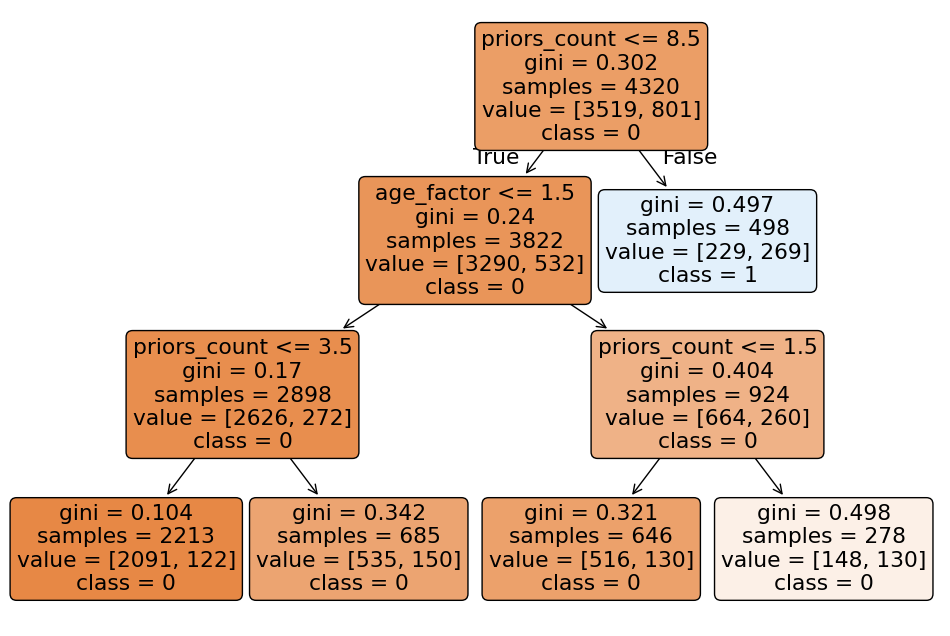

In [ ]:
# Plot the pruned tree
plt.figure(figsize=(12, 8))
plot_tree(dtc, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)
plt.show()

## Let's analyze the decision trees both before and after pruning!

- Before applying the pruning method the model is complex, with multiple splits that may capture specific patterns but risk to overfitting and refelecting daa biases. However, after pruning, the model is simpler and more interpretable, focusing on prior_count and age_factor variables, but this simplicity may overlook important context and increase the risk of unfairly penalizing certain groups.

- The pruned tree may improve fairness slightly by simplifying the model and reducing overfitting to specific cases. However, by focusing on just a few features, it could ignore potentially fairer predictive indicators, leading to biased predictions that fail to account for individual circumstances. The decision tree primarily categorizes individuals based on prior offenses and age, factors that, while predictive, may reflect broader social inequities rather than personal likelihood to reoffend. Using such a model in the criminal justice system could exacerbate existing disparities.